In [1]:
import pymc3 as pm

from bayesumis.umis_math_model import UmisMathModel
from bayesumis.umis_diagram import UmisDiagram
from stafdb.staf_factory import StafFactory
from testhelper.posterior_plotters import display_parameters

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def make_stafids_from_ranges(ranges):
    stafids = []
    for (l, u) in ranges:
        str_range = [str(x) for x in range(l, u+1)]
        stafids = stafids + str_range
    return stafids

In [3]:
staf_factory = StafFactory('csvs_zinc_cycle_graedal_2005')

# stafs [1-2] are external inflows
# stafs [3-8, 11-16, 18-22] are internal stafs
# stafs [9-10, 17] are external outflows
external_inflow_stafids = make_stafids_from_ranges([(1,2)])
internal_stafs_stafids = make_stafids_from_ranges([(3,8), (11,16), (18,22)])
external_outflow_stafids = make_stafids_from_ranges([(9,10), (17,17)])


In [4]:
external_inflows = staf_factory.build_stafs(external_inflow_stafids)
internal_stafs = staf_factory.build_stafs(internal_stafs_stafids)
external_outflows = staf_factory.build_stafs(external_outflow_stafids)

ref_material = staf_factory.build_material('1')
ref_timeframe = staf_factory.build_timeframe('1')

In [5]:
umis_diagram = UmisDiagram(
    external_inflows,
    internal_stafs,
    external_outflows
)

In [6]:
res_inflows = umis_diagram.get_external_inflows()
res_dict = umis_diagram.get_process_stafs_dict()
res_outflows = umis_diagram.get_external_outflows()

In [7]:
print("Inflows")
for x in res_inflows:
    print(x)
    
print()
print()

print("Internal Stafs")
for key, values in res_dict.items():
    print(key)
    for val in values.flows:
        print(val)
    print()
    if values.stock is not None:
        print(values.stock)
    print("----------------")
    
print()
print()

print("Outflows")
for x in res_outflows:
    print(x)

Inflows
Staf: Imported Refined Zinc, ID: 2
Staf: Concentrate, ID: 1


Internal Stafs
Process: Production: Mill, Smelter, Refinery – Transformation, STAFDB ID: 2
Staf: Distributed Production, ID: 3

----------------
Process: Production: Mill, Smelter, Refinery – Distribution, STAFDB ID: 3
Staf: Slag, ID: 6
Staf: Production Refined Zinc, ID: 5
Staf: Production Mass Balance, ID: 4

----------------
Process: Production: Mass balance, STAFDB ID: 5

----------------
Process: Fabrication and Manufacturing – Transformation, STAFDB ID: 6
Staf: Distributed Fabrication and Manufacturing, ID: 8

----------------
Process: Environment, STAFDB ID: 14

Staf: Dissipation to Environment, ID: 22
----------------
Process: Production: Mill, Smelter, Refinery – Stock, STAFDB ID: 4

Staf: Production Stock, ID: 7
----------------
Process: Fabrication and Manufacturing – Distribution, STAFDB ID: 7
Staf: Fabrication and Manufacturing Discards, ID: 12
Staf: Products, ID: 11

----------------
Process: Use – Trans

In [8]:
math_model = UmisMathModel(
    res_inflows,
    res_dict,
    res_outflows,
    ref_material,
    ref_timeframe)

TCs for process 2_2 at index 0 to processes ['3_2'] with priors [1]


/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


TCs for process 3_2 at index 1 to processes ['14_2', '6_2', '5_2'] with priors [1 1 1]
TCs for process 14_2 at index 2 to processes ['15_2'] with priors [1]
TCs for process 6_2 at index 3 to processes ['7_2'] with priors [1]
Process with id: 5_2, has no outflows
TCs for process 5_2 at index 4 to processes [] with priors [0]


/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


TCs for process 7_2 at index 5 to processes ['11_2', '8_2', '16_1', '17_1'] with priors [1 1 1 1]
TCs for process 11_2 at index 7 to processes ['12_2'] with priors [1]
TCs for process 8_2 at index 8 to processes ['9_2', '10_2'] with priors [0.5, 0.5]
TCs for process 9_2 at index 9 to processes ['11_2'] with priors [1]


/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


TCs for process 12_2 at index 11 to processes ['13_2', '2_2', '14_2', '6_2', '18_1'] with priors [1 1 1 1 1]
Process with id: 13_2, has no outflows
TCs for process 13_2 at index 12 to processes [] with priors [0]
Process with id: 16_1, has no outflows
TCs for process 16_1 at index 13 to processes [] with priors [0]
Process with id: 17_1, has no outflows
TCs for process 17_1 at index 14 to processes [] with priors [0]
Process with id: 18_1, has no outflows
TCs for process 18_1 at index 15 to processes [] with priors [0]
Adding value 110.0 as flow input to process 6_2
Adding value 1.0 as input_conc to process 6_2
Adding value 120.0 as flow input to process 2_2
Adding value 1.0 as input_conc to process 2_2
Adding value 5.0 as stock input to process 2_2
Adding value 1.0 as stock input conc to process 2_2


/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [9]:
sample_size = 3000

with math_model.pm_model:
    trace = pm.sample(sample_size)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: Futu

In [10]:
map_estimate = pm.find_MAP(model=math_model.pm_model)

/home/tom/.local/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

Estimates of: External Inflows

Input Flow: Concentrate: 120.02713264555999
Input Flow: Imported Refined Zinc: 109.99023522651599


Estimates of: Internal Stafs

TC: Distributed Production: 1.0
Internal Staf: Distributed Production: 131.02715069967036
TC: Production Mass Balance: 0.12231911012923784
Internal Staf: Production Mass Balance: 16.027124476353222
TC: Production Refined Zinc: 0.8395208426099775
Internal Staf: Production Refined Zinc: 110.00002396017176
TC: Slag: 0.038160047260784674
Internal Staf: Slag: 5.000002263145377
Internal Staf: Production Stock: 4.999997957002035
TC: Distributed Fabrication and Manufacturing: 1.0
Internal Staf: Distributed Fabrication and Manufacturing: 241.9904579793979
TC: Products: 0.7024723127144169
Internal Staf: Products: 169.99159667160856
TC: Fabrication and Manufacturing Discards: 0.20248284141958936
Internal Staf: Fabrication and Manufacturing Discards: 48.99891552809623
TC: Distributed Use: 0.7647251396784889
Internal Staf: Distributed Use:

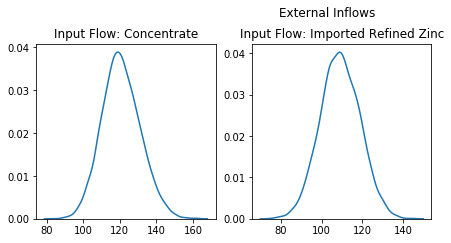

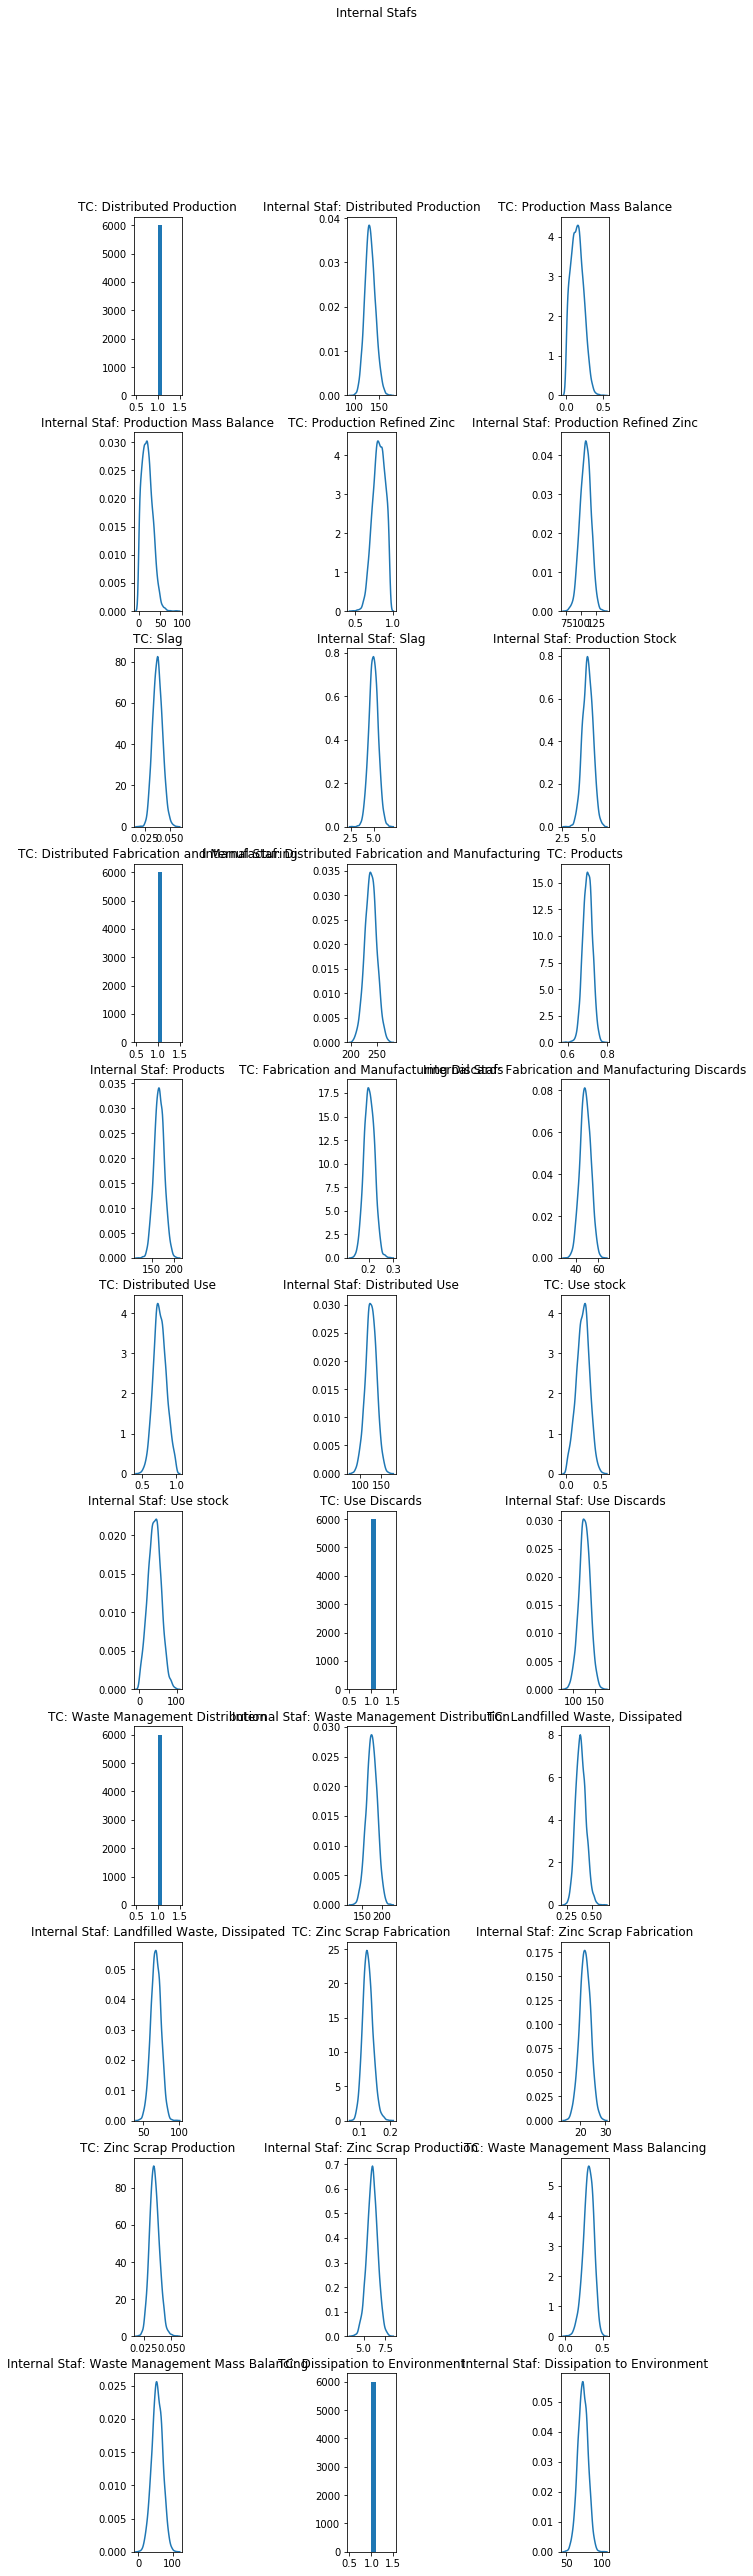

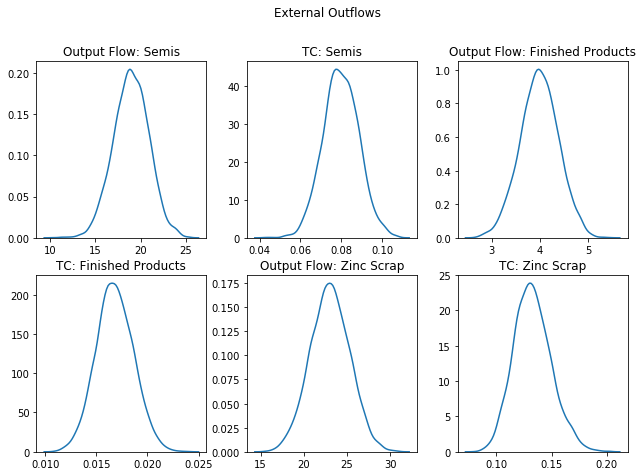

In [11]:
display_parameters(external_inflows, internal_stafs, external_outflows, trace, map_estimate, math_model)